C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


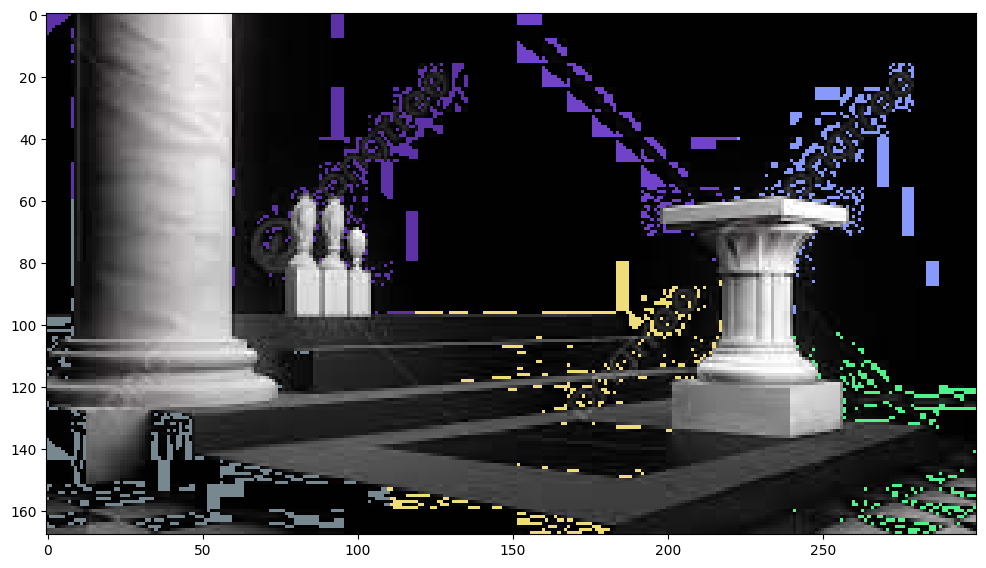

In [9]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Загрузка изображения
image = Image.open('d.jpg')
pix = np.array(image)  # Преобразование изображения в массив numpy

# Определение цвета объекта (в RGB)
object_color = [0, 0, 0]  # Например, красный объект

# Функция для нахождения пикселей с заданным цветом
def find_pixels_with_color(image_pixels, color):
    return np.argwhere(np.all(image_pixels == color, axis=-1))

# Находим пиксели с цветом объекта
object_pixels = find_pixels_with_color(pix, object_color)

# Преобразуем пиксели объекта в формат данных для кластеризации
data = [(x, y, pix[x, y][0], pix[x, y][1], pix[x, y][2]) for x, y in object_pixels]

# Применяем кластеризацию методом KMeans
n_clusters = 6  # Количество кластеров (можно изменить)
kmeans = KMeans(n_clusters=n_clusters)
object_clusters = kmeans.fit_predict(data)

# Создаем цвета для каждого кластера
colors = [(int(255 * np.random.random()), int(255 * np.random.random()), int(255 * np.random.random())) 
          for _ in range(n_clusters)]

# Заменяем пиксели на цвета кластеров
for p, c in zip(object_pixels, object_clusters):
    pix[p[0], p[1]] = colors[c]

# Отображаем изображение
plt.rcParams['figure.figsize'] = (12, 8)
plt.imshow(pix)
plt.show()
